In [1]:
# Check the data
import pandas as pd
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
station="28079004"

In [3]:
df = pd.read_csv(f"/home/sebas/data/air_qual_aemet/{station}.csv",sep=";")

In [4]:
df.head()

,DATE,AEMET.BLH,AEMET.SP,AEMET.T2M,AEMET.TP,AEMET.U10,AEMET.V10,AEMET.WS,AEMET.WD,MACC.NO2,MACC.O3,MACC.PM10,MACC.PM25,SPA.NO2,SPA.O3,SPA.PM10,SPA.PM25
0,2013-07-01 10:00:00,649.157471,94378.5000,296.492920,4.235165e-22,-2.145237,0.100364,2.147583,92.678598,34.911728,49.551208,14.674492,11.609944,57.0,NaN,NaN,NaN
1,2013-07-01 11:00:00,781.914062,94366.6250,298.389648,4.235165e-22,-1.874795,0.412883,1.919721,102.419892,37.657890,53.360588,15.406871,12.252560,57.0,NaN,NaN,NaN
2,2013-07-01 12:00:00,972.309570,94331.1250,300.313965,4.235165e-22,-1.585706,0.771409,1.763387,115.941839,26.125113,64.737213,15.268597,9.232553,45.0,NaN,NaN,NaN
3,2013-07-01 13:00:00,2179.478760,94291.6875,302.364014,4.235165e-22,-1.357002,1.302465,1.880923,133.825214,19.706379,73.538773,12.838573,8.626498,42.0,NaN,NaN,NaN
4,2013-07-01 14:00:00,3467.073242,94220.6875,304.050781,4.235165e-22,-0.867949,1.785319,1.985119,154.072887,20.176041,82.475800,13.182467,8.578526,30.0,NaN,NaN,NaN


In [5]:
# Limiting Date
df = df[df["DATE"]<"2020-01-01"]

In [6]:
tdf = df[["DATE","SPA.NO2"]].copy()
tdf.columns = ["DATE","NO2"]

1. Data partitioning
2. Addressing missing values
3. Log transformation
4. Apply STL Decomposition
5. Moving window transformation (For the relevant architectures)
6. Trend normalisation

In [7]:
tdf["NO2"]=np.log1p(tdf["NO2"])

In [8]:
tdf.head()

,DATE,NO2
0,2013-07-01 10:00:00,4.060443
1,2013-07-01 11:00:00,4.060443
2,2013-07-01 12:00:00,3.828641
3,2013-07-01 13:00:00,3.761200
4,2013-07-01 14:00:00,3.433987


In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

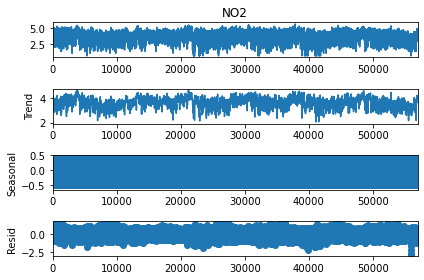

In [35]:
stl = seasonal_decomp = seasonal_decompose(tdf["NO2"], model="additive",period=24)
stl.plot();

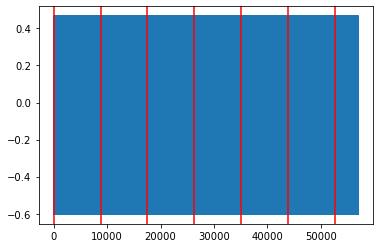

In [36]:
plt.plot(stl.seasonal)
for i in stl.seasonal.index:
    if i%(24*365)==0:
        plt.axvline(x=i,c="red")

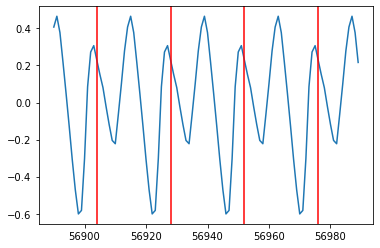

In [38]:
plt.plot(stl.seasonal[-100:])
for i in stl.seasonal[-100:].index:
    if i%24==0:
        plt.axvline(x=i,c="red")

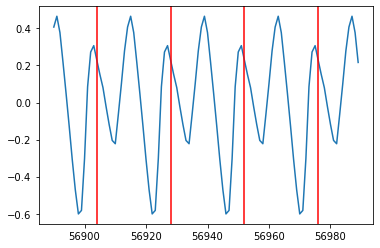

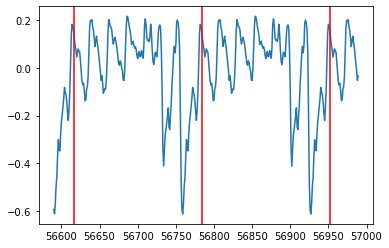

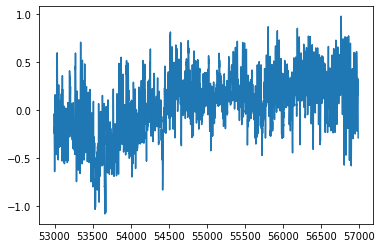

In [52]:
# Let's try several decomp
signal = tdf["NO2"]

# Day
season24 = seasonal_decompose(signal, model="additive",period=24)
plt.plot(season24.seasonal[-100:])
for i in season24.seasonal[-100:].index:
    if i%24==0:
        plt.axvline(x=i,c="red")
plt.show()
signal=signal-season24.seasonal

# Week
season168 = seasonal_decompose(signal, model="additive",period=24*7)
plt.plot(season168.seasonal[-400:])
for i in season168.seasonal[-400:].index:
    if i%168==0:
        plt.axvline(x=i,c="red")
plt.show()
signal=signal-season168.seasonal

# Year
seasony = seasonal_decompose(signal, model="additive",period=24*365)
plt.plot(seasony.seasonal[-4000:])
for i in seasony.seasonal[-4000:].index:
    if i%(24*365)==0:
        plt.axvline(x=i,c="red")
plt.show()
signal=signal-seasony.seasonal

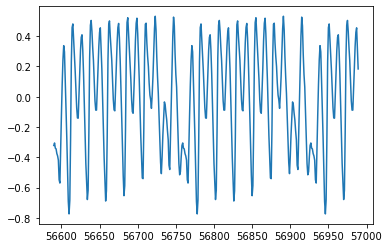

In [49]:
plt.plot(season12.seasonal[-400:]+season24.seasonal[-400:]+season168.seasonal[-400:])

# Main conclusion

We should be removing several seasonalities:
- Day --> Which hour 
- Week --> Which day of the week
- Month --> Which day of the month
- Year --> Which month

But then the question is how we calculate the trend for the local normalisation.

So we will keep the 24H seasonality only.